In [18]:
import os
import pandas as pd

SHALLOW_PATH = os.path.join("datasets", "song2020")

def create_directory(shallow_path = SHALLOW_PATH):
    if not os.path.isdir(shallow_path):
        os.makedirs(shallow_path)
        # this creates a directory, "datasets/housing" in the workspace
    shallow_path = os.path.join(shallow_path, "shallow.csv")

create_directory()

In [19]:
shallow_path = SHALLOW_PATH + "/shallow.csv"

In [20]:
shallow = pd.read_csv(shallow_path)
shallow.head()

,Group,ID,List,Target,ACC,RT,logRT,Critical_Filler,Word_Nonword,Relation_type,Branching
0,L1,L1_01,A,banoshment,1,423,6.0474,Filler,Nonword,Phonological,NaN
1,L1,L1_01,A,unawareness,1,603,6.4019,Critical,Word,Unrelated,Left
2,L1,L1_01,A,unholiness,1,739,6.6053,Critical,Word,Constituent,Left
3,L1,L1_01,A,bictimize,1,510,6.2344,Filler,Nonword,Phonological,NaN
4,L1,L1_01,A,unhappiness,1,370,5.9135,Critical,Word,Unrelated,Left


In [21]:
shallow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Group            6500 non-null   object 
 1   ID               6500 non-null   object 
 2   List             6500 non-null   object 
 3   Target           6500 non-null   object 
 4   ACC              6500 non-null   int64  
 5   RT               6500 non-null   int64  
 6   logRT            6429 non-null   float64
 7   Critical_Filler  6500 non-null   object 
 8   Word_Nonword     6500 non-null   object 
 9   Relation_type    6500 non-null   object 
 10  Branching        1950 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 558.7+ KB


In [22]:
shallow["Group"].value_counts()
shallow["Branching"].value_counts("Right")


Branching
Left     0.6
Right    0.4
Name: proportion, dtype: float64

In [23]:
shallow_with_id = shallow.reset_index()   # adds an `index` column
shallow_with_id.head()

,index,Group,ID,List,Target,ACC,RT,logRT,Critical_Filler,Word_Nonword,Relation_type,Branching
0,0,L1,L1_01,A,banoshment,1,423,6.0474,Filler,Nonword,Phonological,NaN
1,1,L1,L1_01,A,unawareness,1,603,6.4019,Critical,Word,Unrelated,Left
2,2,L1,L1_01,A,unholiness,1,739,6.6053,Critical,Word,Constituent,Left
3,3,L1,L1_01,A,bictimize,1,510,6.2344,Filler,Nonword,Phonological,NaN
4,4,L1,L1_01,A,unhappiness,1,370,5.9135,Critical,Word,Unrelated,Left


In [24]:
print(shallow_with_id)

      index Group     ID List        Target  ACC    RT   logRT  \
0         0    L1  L1_01    A    banoshment    1   423  6.0474   
1         1    L1  L1_01    A   unawareness    1   603  6.4019   
2         2    L1  L1_01    A    unholiness    1   739  6.6053   
3         3    L1  L1_01    A     bictimize    1   510  6.2344   
4         4    L1  L1_01    A   unhappiness    1   370  5.9135   
...     ...   ...    ...  ...           ...  ...   ...     ...   
6495   6495    L2  L2_38    F    impediment    0  1347  7.2056   
6496   6496    L2  L2_38    F  reattachable    1  1578  7.3639   
6497   6497    L2  L2_38    F   unsharpness    1  1991  7.5964   
6498   6498    L2  L2_38    F   teasurement    0     0     NaN   
6499   6499    L2  L2_38    F     bictimize    1  1468  7.2917   

     Critical_Filler Word_Nonword Relation_type Branching  
0             Filler      Nonword  Phonological       NaN  
1           Critical         Word     Unrelated      Left  
2           Critical       

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(shallow, shallow["Group"]):
    strat_train_set = shallow.loc[train_index]
    strat_test_set = shallow.loc[test_index]

In [26]:
strat_test_set["Group"].value_counts() / len(strat_test_set)

Group
L2    0.553846
L1    0.446154
Name: count, dtype: float64

In [27]:
def group_proportions(data):
    return data["Group"].value_counts() / len(data)

train_set, test_set = train_test_split(shallow, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": group_proportions(shallow),
    "Stratified %": group_proportions(strat_test_set),
    "Random %": group_proportions(test_set),
}).sort_index()
compare_props.index.name = "Group"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Group,,,,,
L1,44.62,44.62,45.62,0.0,2.24
L2,55.38,55.38,54.38,0.0,-1.81


In [28]:
shallow2 = strat_train_set.copy()

array([[<Axes: xlabel='logRT', ylabel='logRT'>]], dtype=object)

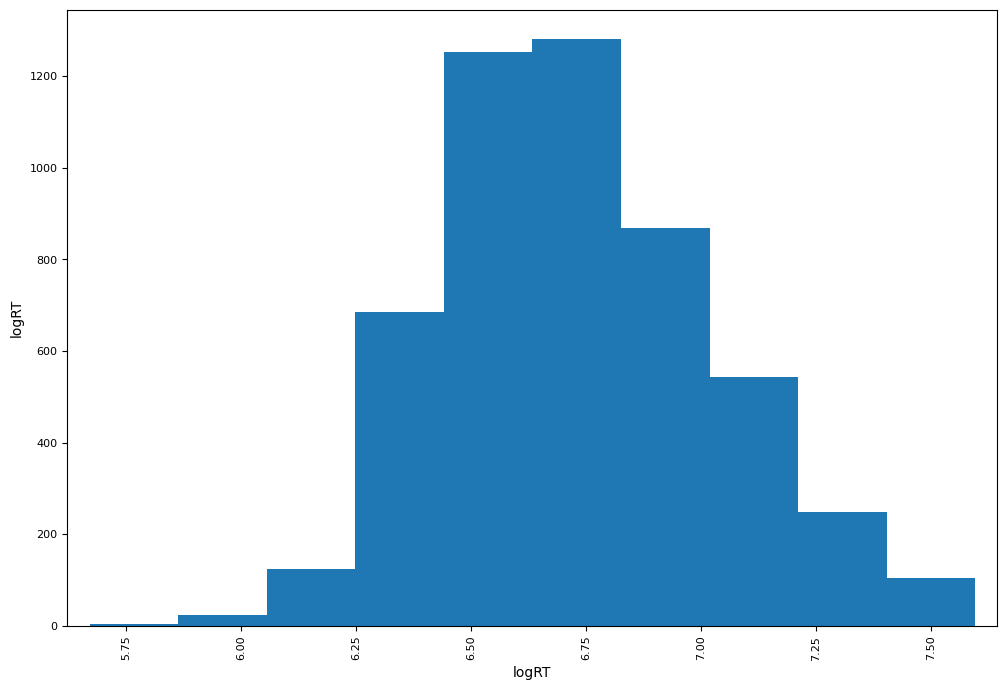

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["logRT", "Relation_type"]
scatter_matrix(shallow2[attributes], figsize=(12, 8))